In [1]:
from pyofss import Domain, System, Gaussian, Fibre, OpenclFibre
from pyofss import temporal_power, spectral_power, lambda_to_nu, nu_to_lambda, multi_plot, labels
import numpy as np
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import pylab as plt
plt.switch_backend('agg')

import time


In [4]:
domain = Domain(bit_width=200.0, samples_per_bit=2048*16)
gaussian = Gaussian(peak_power=1.0, width=1.0)

fib = Fibre(length=5.0, cycle="cycle0", name="fibre0", method='rk4ip', total_steps=200, traces=200, 
            beta=[0.0, 0.0, 0.0, 1.0], gamma=1.0, self_steepening=False, use_all=True)

fib1 = Fibre(length=5.0, cycle="cycle0", name="fibre1", method='rk4ip', total_steps=200, traces=200, 
            beta=[0.0, 0.0, 0.0, 1.0], gamma=1.0, self_steepening=False, use_all=True)

sys = System(domain)
sys.add(gaussian)
sys.add(fib)
sys.add(fib1)

start = time.time()
sys.run()
stop = time.time()
NO_CL_OUT = sys.field

print("Run time without cl is {}".format(stop-start))

#single_plot(sys.domain.t, temporal_power(sys.field), labels["t"], labels["P_t"],
#            x_range=(-20.0, 40.0), use_fill=False)
#plt.savefig('raman_without_cl')



Using general expression for nonlinearity
Using general expression for nonlinearity
Caching linear factor


c:\Users\User1\Programs\examples\pyofss\modules\fibre.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  self.L_D = T_0**2 / (10**3 * self.beta_2)
c:\Users\User1\Programs\examples\pyofss\modules\stepper.py:146: UserWarning: None: fibre0: h must be much less than dispersion length (L_D) and the nonlinear length (L_NL)
                        now the minimum of the characteristic distances is equal to 1.000000*km* 
                         step is equal to 0.025*km*
  warnings.warn(
c:\Users\User1\Programs\examples\pyofss\modules\stepper.py:146: UserWarning: None: fibre1: h must be much less than dispersion length (L_D) and the nonlinear length (L_NL)
                        now the minimum of the characteristic distances is equal to 1.797610*km* 
                         step is equal to 0.025*km*
  warnings.warn(


Caching linear factor
Run time without cl is 7.727493762969971


In [5]:
sys.get_laser_info()

KeyboardInterrupt: 

In [6]:
print(sys.df_results)

           max_value    energy duration spec_width                  peaks
z [mm]                                                                   
25000.0     0.999897  0.001772      NaN        NaN                [16386]
50000.0     0.999596  0.001772      NaN        NaN                [16388]
75000.0     0.999116  0.001772      NaN        NaN                [16390]
100000.0    0.998471  0.001772      NaN        NaN                [16392]
125000.0    0.997673  0.001772      NaN        NaN                [16394]
...              ...       ...      ...        ...                    ...
4900000.0   0.562220  0.001772      NaN        NaN  [16640, 17062, 17381]
4925000.0   0.560726  0.001772      NaN        NaN  [16642, 17063, 17383]
4950000.0   0.559242  0.001772      NaN        NaN  [16643, 17065, 17385]
4975000.0   0.557765  0.001772      NaN        NaN  [16644, 17066, 17387]
5000000.0   0.556294  0.001772      NaN        NaN  [16645, 17068, 17389]

[200 rows x 5 columns]


In [4]:
sys1 = System(domain)
sys1.add(gaussian)
sys1.add(OpenclFibre(length=5.0, total_steps=200, 
            beta=[0.0, 0.0, 0.0, 1.0], gamma=1.0, self_steepening=False, use_all=True,
            dorf='double'))
start = time.time()
sys1.run()
stop = time.time()
CL_OUT = sys1.field

Using general expression for nonlinearity
Caching linear factor


In [13]:
print("Run time with cl is {}".format(stop-start))

multi_plot(sys1.domain.t, [temporal_power(sys.field), temporal_power(sys1.field)], ["cpu", "gpu"], labels["t"], labels["P_t"],
            x_range=(-20.0, 40.0), use_fill=False)
plt.savefig('raman_cl_compare')


df_results = sys.get_laser_info()
energy_arr = df_results['energy'].values
energy_arr1 = np.array(sys1.modules[1].energy_list)
multi_plot(df_results.index.get_level_values("z [mm]").values, [energy_arr, energy_arr1], ["cpu", "gpu"], labels["z"], "E_t", use_fill=False)
plt.savefig('raman_cl_compare_energy')

peaks_arr = df_results['peaks'].values
peaks_arr1 = np.array(sys1.modules[1].peaks_list)

NO_CL_POWER = temporal_power(NO_CL_OUT)
CL_POWER = temporal_power(CL_OUT)
DELTA_POWER = NO_CL_POWER - CL_POWER

MEAN_RELATIVE_ERROR = np.mean(np.abs(DELTA_POWER))
MEAN_RELATIVE_ERROR /= np.max(temporal_power(NO_CL_OUT))

MAX_RELATIVE_ERROR = np.max(np.abs(DELTA_POWER))
MAX_RELATIVE_ERROR /= np.max(temporal_power(NO_CL_OUT))

print("Mean relative error: %e" % MEAN_RELATIVE_ERROR)
print("Max relative error: %e" % MAX_RELATIVE_ERROR)

No handles with labels found to put in legend.


Run time with cl is 1.7203943729400635

Generating multi_plot...


c:\Users\User1\Programs\examples\pyofss\modules\plotter.py:341: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
No handles with labels found to put in legend.



Generating multi_plot...
Mean relative error: 1.226288e-04
Max relative error: 5.999521e-03


c:\Users\User1\Programs\examples\pyofss\modules\plotter.py:341: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\User1\AppData\Local\Temp/ipykernel_10836/2167673865.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peaks_arr1 = np.array(sys1.modules[1].peaks_list)


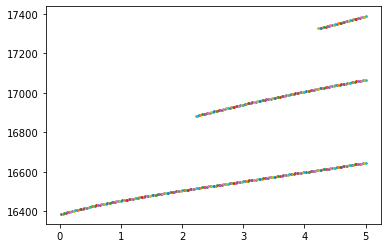

In [22]:
%matplotlib inline
for i in range(len(sys1.modules[1].peaks_list)):
    peaks_arr = np.array(sys1.modules[1].peaks_list[i])
    z_arr = np.full(peaks_arr.shape, df_results.index.get_level_values("z [mm]").values[i])
    plt.scatter(z_arr, peaks_arr, s=3)
    
plt.show()

In [4]:
power_arr = df_results['max_value'].values
power_arr1 = np.array(sys1.modules[1].max_power_list)
multi_plot(df_results.index.get_level_values("z [mm]").values, [power_arr, power_arr1], ["cpu", "gpu"], labels["z"], "P_max", use_fill=False)
plt.savefig('raman_cl_compare_max_power')

No handles with labels found to put in legend.



Generating multi_plot...


c:\Users\User1\Programs\examples\pyofss\modules\plotter.py:341: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


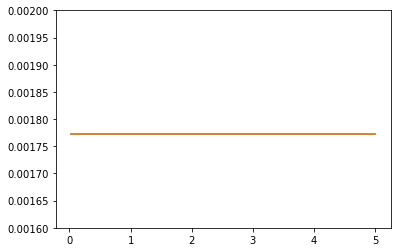

In [23]:
%matplotlib inline
plt.plot(df_results.index.get_level_values("z [mm]").values, energy_arr)
plt.plot(df_results.index.get_level_values("z [mm]").values, energy_arr1)
plt.ylim(0.016e-1, 0.02e-1)
plt.show()

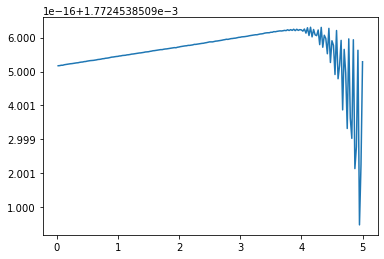

In [10]:
plt.plot(df_results.index.get_level_values("z [mm]").values, energy_arr1)
plt.show()

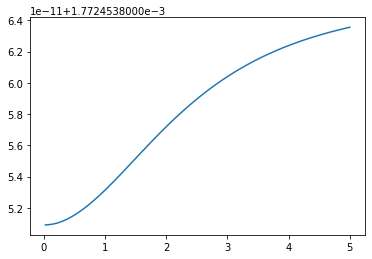

In [20]:
plt.plot(df_results.index.get_level_values("z [mm]").values, energy_arr)
plt.show()